In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [ ]:
dataset = pd.read_csv("powerconsumption.csv")
dataset.index = pd.to_datetime(dataset['Datetime'])
dataset = dataset.drop(['Datetime', 'PowerConsumption_Zone2', 'PowerConsumption_Zone3'], axis=1)
dataset.head()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52416 entries, 2017-01-01 00:00:00 to 2017-12-30 23:50:00
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature             52416 non-null  float64
 1   Humidity                52416 non-null  float64
 2   WindSpeed               52416 non-null  float64
 3   GeneralDiffuseFlows     52416 non-null  float64
 4   DiffuseFlows            52416 non-null  float64
 5   PowerConsumption_Zone1  52416 non-null  float64
dtypes: float64(6)
memory usage: 2.8 MB


In [ ]:
daily_data = dataset.resample('8h').mean()
daily_data.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1
Datetime,,,,,,
2017-01-01 00:00:00,5.083646,75.887500,0.082146,0.061771,0.121021,22277.721519
2017-01-01 08:00:00,10.894333,62.904167,0.786896,323.451729,34.744208,27215.316455
2017-01-01 16:00:00,13.047917,66.766250,0.076396,40.658813,43.116542,35902.658227
2017-01-02 00:00:00,10.229167,81.000000,0.076833,0.069417,0.141604,21995.822784
2017-01-02 08:00:00,13.473750,66.645208,0.077250,321.640250,39.401500,27516.708861


In [ ]:
daily_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1092 entries, 2017-01-01 00:00:00 to 2017-12-30 16:00:00
Freq: 8H
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature             1092 non-null   float64
 1   Humidity                1092 non-null   float64
 2   WindSpeed               1092 non-null   float64
 3   GeneralDiffuseFlows     1092 non-null   float64
 4   DiffuseFlows            1092 non-null   float64
 5   PowerConsumption_Zone1  1092 non-null   float64
dtypes: float64(6)
memory usage: 59.7 KB


In [ ]:
daily_data.describe()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1
count,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000,1092.000000
mean,18.810024,68.259518,1.959489,182.696614,75.028022,32344.970564
std,5.544338,13.824825,2.285540,224.938588,86.602630,6094.830254
min,4.487167,19.653958,0.061792,0.037667,0.100521,17808.227848
25%,14.419635,58.993073,0.079380,9.728385,7.212932,27279.279058
50%,18.834271,69.901354,0.086250,80.265333,44.405042,32585.802721
75%,22.786875,78.704688,4.913536,301.178578,113.958802,37409.049180
max,35.827292,93.016667,4.949958,763.735417,557.107917,45197.380688


<Axes: >

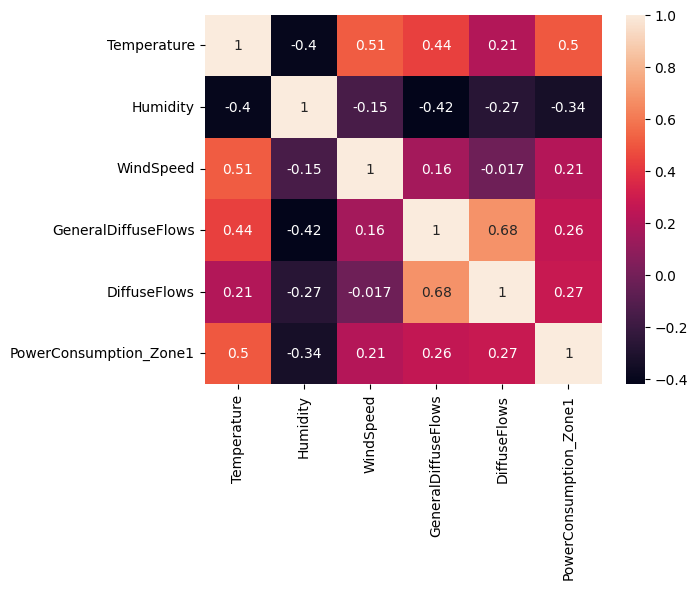

In [ ]:
sns.heatmap(daily_data.corr(), annot=True)

In [ ]:

from sklearn.model_selection import train_test_split
X = daily_data.iloc[:,:-1].values
y = daily_data['PowerConsumption_Zone1'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [ ]:
missing_values = daily_data.isnull().sum()
print(missing_values)


Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
dtype: int64


In [ ]:
# prompt: check for outliers and remove them

def remove_outliers(df, columns):
  for col in columns:
    # Calculate the interquartile range (IQR)
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1

    # Define the lower and upper bounds
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Identify and remove outliers
    outlier_indices = df[((df[col] < lower_bound) | (df[col] > upper_bound))].index
    df.drop(outlier_indices, inplace=True)

# Specify the columns to check for outliers
columns_to_check = ['Temperature', 'Humidity','WindSpeed','GeneralDiffuseFlows','DiffuseFlows','PowerConsumption_Zone1']

# Remove outliers
remove_outliers(daily_data, columns_to_check)

# Check for remaining missing values
missing_values = daily_data.isnull().sum()
print(missing_values)


Temperature               0
Humidity                  0
WindSpeed                 0
GeneralDiffuseFlows       0
DiffuseFlows              0
PowerConsumption_Zone1    0
dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

Y_train = Y_train.reshape(-1, 1)
Y_train = scaler_y.fit_transform(Y_train).ravel()

Y_test = Y_test.reshape(-1, 1)
Y_test = scaler_y.transform(Y_test).ravel()

In [ ]:
# prompt: implement all regression models with r2 value for each

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, Y_train)
y_pred_linear = linear_model.predict(X_test)
r2_linear = r2_score(Y_test, y_pred_linear)
print("Linear Regression R2:", r2_linear)

# Polynomial Regression
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_poly, Y_train)
y_pred_poly = poly_model.predict(poly_features.transform(X_test))
r2_poly = r2_score(Y_test, y_pred_poly)
print("Polynomial Regression R2:", r2_poly)

# Support Vector Regression
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, Y_train)
y_pred_svr = svr_model.predict(X_test)
r2_svr = r2_score(Y_test, y_pred_svr)
print("Support Vector Regression R2:", r2_svr)

# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
dtree_model = DecisionTreeRegressor()
dtree_model.fit(X_train, Y_train)
y_pred_dtree = dtree_model.predict(X_test)
r2_dtree = r2_score(Y_test, y_pred_dtree)
print("Decision Tree Regression R2:", r2_dtree)

# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, Y_train)
y_pred_rf = rf_model.predict(X_test)
r2_rf = r2_score(Y_test, y_pred_rf)
print("Random Forest Regression R2:", r2_rf)

# Gradient Boosting Regression
from sklearn.ensemble import GradientBoostingRegressor
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, Y_train)
y_pred_gb = gb_model.predict(X_test)
r2_gb = r2_score(Y_test, y_pred_gb)
print("Gradient Boosting Regression R2:", r2_gb)

# XGBoost Regression
from xgboost import XGBRegressor
xgb_model = XGBRegressor()
xgb_model.fit(X_train, Y_train)
y_pred_xgb = xgb_model.predict(X_test)
r2_xgb = r2_score(Y_test, y_pred_xgb)
print("XGBoost Regression R2:", r2_xgb)


Linear Regression R2: 0.38484020701412625
Polynomial Regression R2: 0.5408786311496988
Support Vector Regression R2: 0.690427407135741
Decision Tree Regression R2: 0.6684059625589486
Random Forest Regression R2: 0.8348948860960257
Gradient Boosting Regression R2: 0.807322374532693
XGBoost Regression R2: 0.7892456468941104


In [ ]:
new_data_point = scaler_X.transform([[5.169, 77.9, 0.083, 0.066, 0.108]])

print("Predicted Power Consumption (Linear Regression):", scaler_y.inverse_transform(linear_model.predict(new_data_point).reshape(-1, 1)))
print("Predicted Power Consumption (Polynomial Regression):", scaler_y.inverse_transform(poly_model.predict(poly_features.transform(new_data_point)).reshape(-1, 1)))
print("Predicted Power Consumption (SVR):", scaler_y.inverse_transform(svr_model.predict(new_data_point).reshape(-1, 1)))
print("Predicted Power Consumption (Decision Tree):", scaler_y.inverse_transform(dtree_model.predict(new_data_point).reshape(-1, 1)))
print("Predicted Power Consumption (Random Forest):", scaler_y.inverse_transform(rf_model.predict(new_data_point).reshape(-1, 1)))
print("Predicted Power Consumption (Gradient Boosting):", scaler_y.inverse_transform(gb_model.predict(new_data_point).reshape(-1, 1)))
print("Predicted Power Consumption (XGBoost):", scaler_y.inverse_transform(xgb_model.predict(new_data_point).reshape(-1, 1)))

Predicted Power Consumption (Linear Regression): [[24560.08852491]]
Predicted Power Consumption (Polynomial Regression): [[24919.44678931]]
Predicted Power Consumption (SVR): [[23034.86756748]]
Predicted Power Consumption (Decision Tree): [[21843.85297854]]
Predicted Power Consumption (Random Forest): [[22863.51750624]]
Predicted Power Consumption (Gradient Boosting): [[23065.89407962]]
Predicted Power Consumption (XGBoost): [[22982.729]]


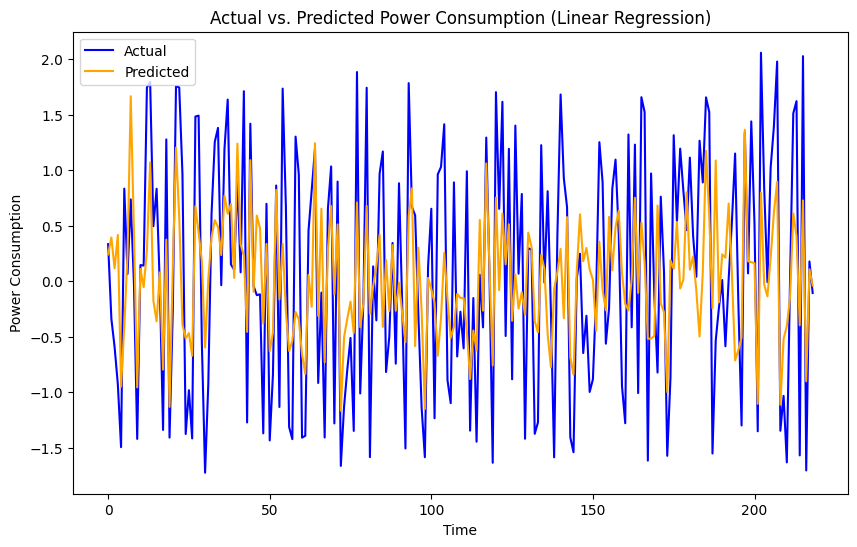

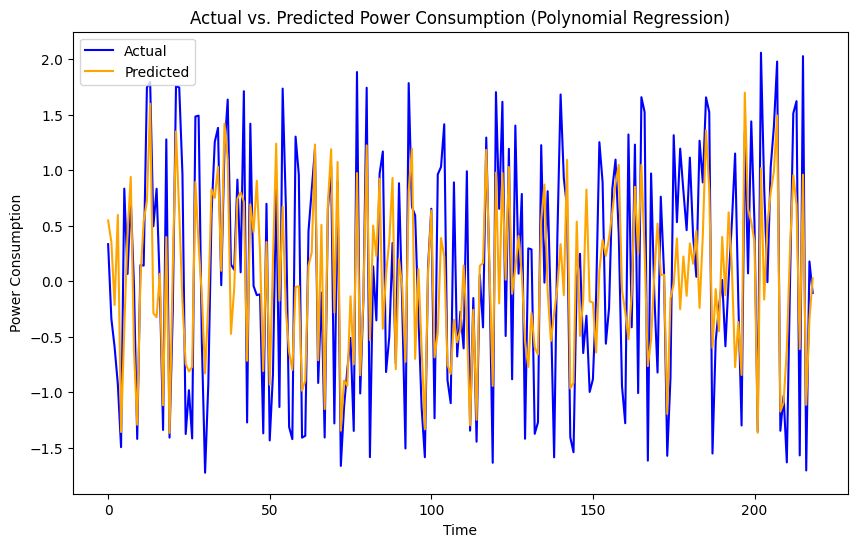

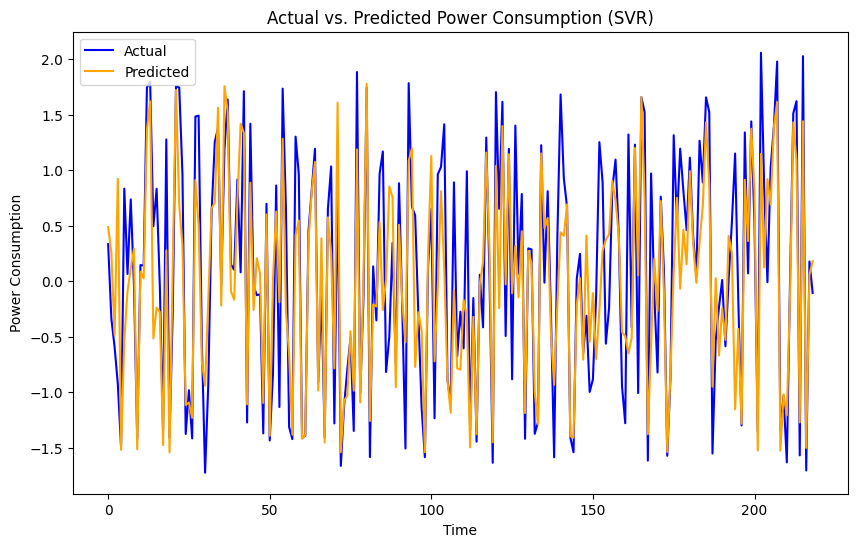

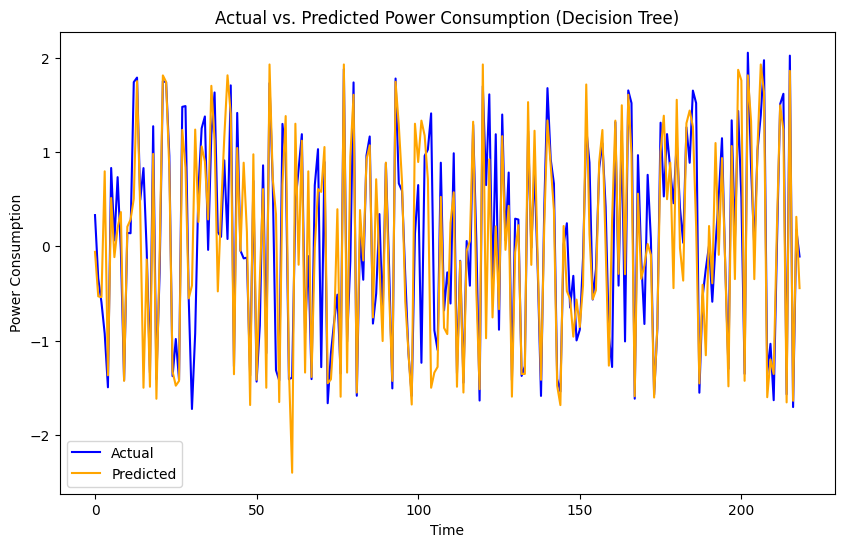

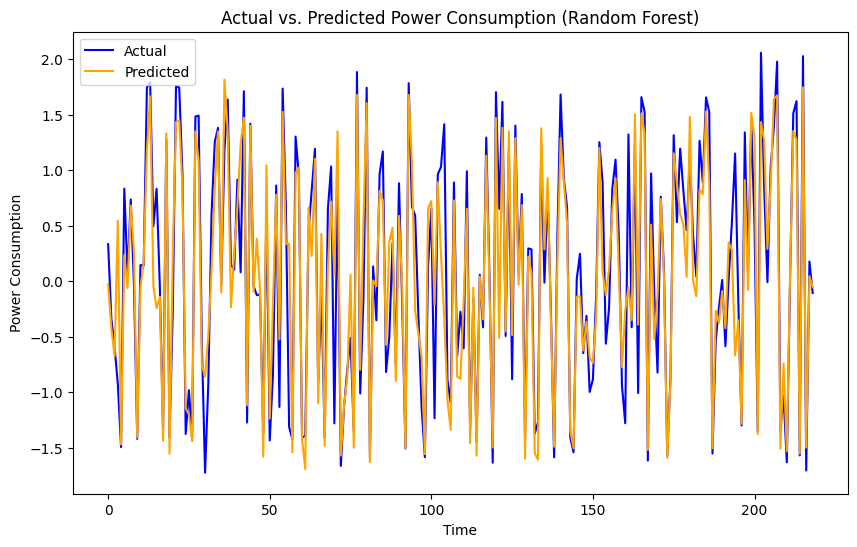

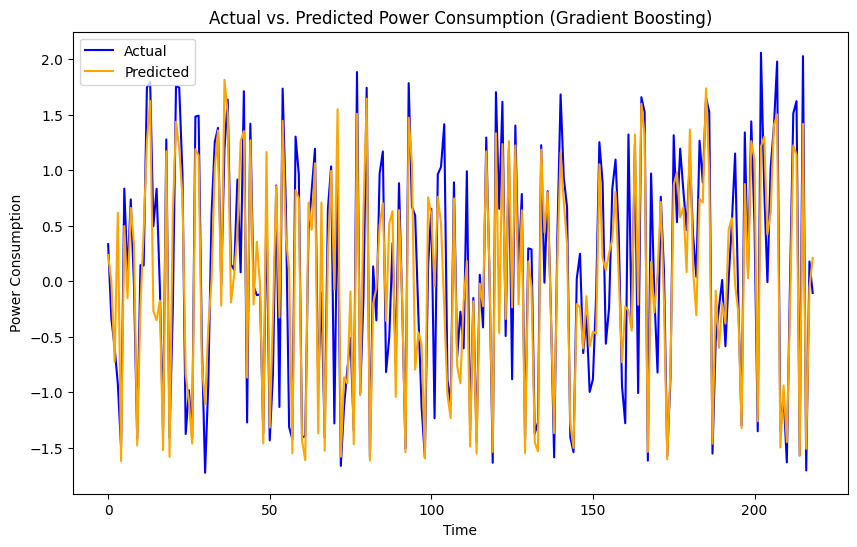

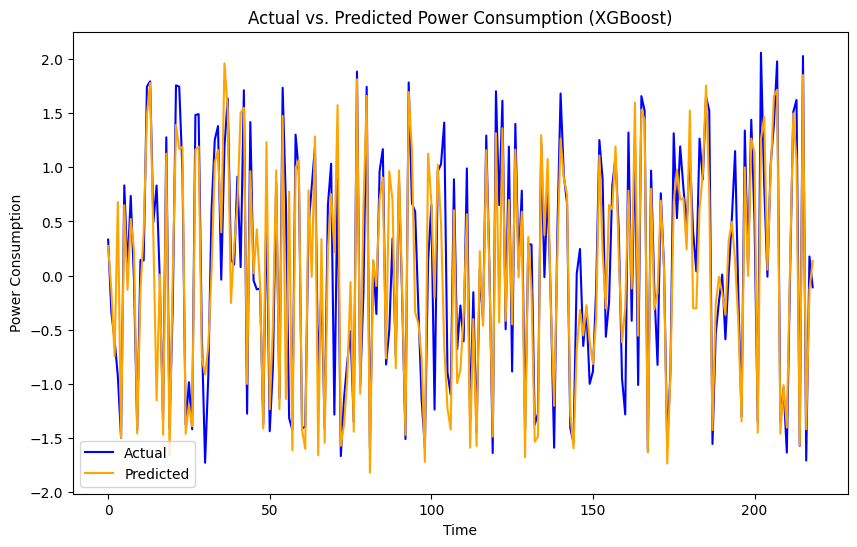

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(Y_test, label="Actual", color="blue")
plt.plot(y_pred_linear, label="Predicted", color="orange")
plt.title("Actual vs. Predicted Power Consumption (Linear Regression)")
plt.xlabel("Time")
plt.ylabel("Power Consumption")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(Y_test, label="Actual", color="blue")
plt.plot(y_pred_poly, label="Predicted", color="orange")
plt.title("Actual vs. Predicted Power Consumption (Polynomial Regression)")
plt.xlabel("Time")
plt.ylabel("Power Consumption")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(Y_test, label="Actual", color="blue")
plt.plot(y_pred_svr, label="Predicted", color="orange")
plt.title("Actual vs. Predicted Power Consumption (SVR)")
plt.xlabel("Time")
plt.ylabel("Power Consumption")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(Y_test, label="Actual", color="blue")
plt.plot(y_pred_dtree, label="Predicted", color="orange")
plt.title("Actual vs. Predicted Power Consumption (Decision Tree)")
plt.xlabel("Time")
plt.ylabel("Power Consumption")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(Y_test, label="Actual", color="blue")
plt.plot(y_pred_rf, label="Predicted", color="orange")
plt.title("Actual vs. Predicted Power Consumption (Random Forest)")
plt.xlabel("Time")
plt.ylabel("Power Consumption")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(Y_test, label="Actual", color="blue")
plt.plot(y_pred_gb, label="Predicted", color="orange")
plt.title("Actual vs. Predicted Power Consumption (Gradient Boosting)")
plt.xlabel("Time")
plt.ylabel("Power Consumption")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(Y_test, label="Actual", color="blue")
plt.plot(y_pred_xgb, label="Predicted", color="orange")
plt.title("Actual vs. Predicted Power Consumption (XGBoost)")
plt.xlabel("Time")
plt.ylabel("Power Consumption")
plt.legend()
plt.show()

